In [3]:
import pandas as pd
rating = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [4]:
rating

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [5]:
secondsperyear = 31557600
rating['year'] = rating['timestamp']//secondsperyear + 1970

In [6]:
rating

,userId,movieId,rating,timestamp,year
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009
...,...,...,...,...,...
27753439,283228,8542,4.5,1379882795,2013
27753440,283228,8712,4.5,1379882751,2013
27753441,283228,34405,4.5,1379882889,2013
27753442,283228,44761,4.5,1354159524,2012


In [7]:
genrelist = set()
for index, row in movies.iterrows():
    currgenres = row['genres'].split("|")
    genrelist.update(currgenres)
genrelist = sorted(genrelist)
print(genrelist)

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [11]:
columns = [i for i in range(1995,2019)]
genrefreqovertime = pd.DataFrame(0.0,index=genrelist, columns=columns).astype(float)
genrefreqovertime.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for index, row in rating.iterrows():
    year = row['year']
    movie = row['movieId']
    y = movies.loc[movie == movies['movieId']]
    relevantgenres = movies['genres'][int(y.index.tolist()[0])]
    relevantgenrelist = relevantgenres.split('|')
    for genre in relevantgenrelist:
        genrefreqovertime[year][genre] += 1

In [13]:
genrefreqovertime.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,16.0,3.0,49.0,1709.0,3895.0,6767.0,5934.0
Action,0.0,534531.0,219494.0,86715.0,292573.0,510264.0,317494.0,224628.0,273003.0,332472.0,...,288938.0,290793.0,242406.0,234102.0,191751.0,180834.0,651557.0,721696.0,673700.0,365175.0
Adventure,0.0,402932.0,180984.0,63352.0,230788.0,401108.0,238694.0,177067.0,216756.0,265309.0,...,227652.0,227728.0,190356.0,183028.0,147870.0,142676.0,503024.0,577143.0,528560.0,293030.0
Animation,0.0,97956.0,34121.0,13320.0,52353.0,87690.0,55085.0,41275.0,53377.0,62862.0,...,70341.0,72964.0,61596.0,57441.0,46836.0,46271.0,162987.0,183444.0,179301.0,99286.0
Children,0.0,183052.0,68403.0,29635.0,95563.0,161434.0,95605.0,71001.0,83757.0,97674.0,...,86767.0,89510.0,75931.0,70155.0,53166.0,47880.0,158438.0,185936.0,176753.0,98896.0


<AxesSubplot:>

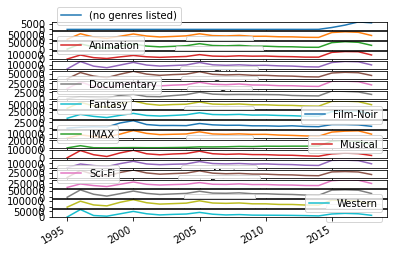

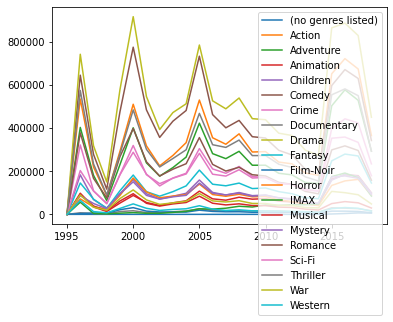

In [14]:
transposed_df = genrefreqovertime.T
transposed_df.plot(subplots=True)
transposed_df.plot()